<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Reformado_Cifar_10_Aula_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

# Cargar datos de CIFAR-10 y dividir en conjuntos de entrenamiento y validación
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# Normalizar imágenes y convertir etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)  # 10 clases en CIFAR-10
y_validation = to_categorical(y_validation, 10)

# Definir generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 clases en CIFAR-10

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Función para mostrar imágenes reformadas durante el entrenamiento
def show_transformed_images(generator, num_images=5):
    for _ in range(num_images):
        batch = generator.next()
        for i in range(len(batch[0])):
            plt.figure()
            plt.imshow(batch[0][i])
            plt.title(f"Class: {np.argmax(batch[1][i])}")
            plt.show()

# Entrenar el modelo durante 5 épocas
for epoch in range(5):
    print(f"Epoch {epoch + 1}/5")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

    # Mostrar imágenes reformadas después de cada época
    show_transformed_images(train_datagen.flow(x_train, y_train), num_images=5)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

# Cargar datos de CIFAR-10 y dividir en conjuntos de entrenamiento y validación
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# Normalizar imágenes y convertir etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)  # 10 clases en CIFAR-10
y_validation = to_categorical(y_validation, 10)

# Definir generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 clases en CIFAR-10

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Función para mostrar imágenes reformadas durante el entrenamiento
def show_transformed_images(generator, num_images=8):
    for _ in range(num_images):
        batch = generator.next()
        for i in range(len(batch[0])):
            plt.figure()
            plt.imshow(batch[0][i])
            plt.title(f"Class: {np.argmax(batch[1][i])}")
            plt.show()

# Entrenar el modelo durante 5 épocas
for epoch in range(5):
    print(f"Epoch {epoch + 1}/5")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

    # Mostrar 1 imágen reformada después de cada época
    show_transformed_images(train_datagen.flow(x_train, y_train), num_images=1)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")


In [ ]:

#Última reforma.
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

# Cargar datos de CIFAR-10 y dividir en conjuntos de entrenamiento y validación
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# Normalizar imágenes y convertir etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)  # 10 clases en CIFAR-10
y_validation = to_categorical(y_validation, 10)

# Definir generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 clases en CIFAR-10

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Función para mostrar imágenes reformadas durante el entrenamiento
def show_transformed_images(generator, num_images=8):
    for _ in range(num_images):
        batch = generator.next()
        for i in range(len(batch[0])):
            plt.figure()
            plt.imshow(batch[0][i])
            plt.title(f"Class: {np.argmax(batch[1][i])}")
            plt.show()

# Entrenar el modelo durante 5 épocas
for epoch in range(5):
    print(f"Epoch {epoch + 1}/5")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

# Mostrar 8 imágenes reformadas después de la última época
show_transformed_images(train_datagen.flow(x_train, y_train), num_images=8)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

# Cargar datos de CIFAR-10 y dividir en conjuntos de entrenamiento y validación
(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# Normalizar imágenes y convertir etiquetas a one-hot encoding
x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)  # 10 clases en CIFAR-10
y_validation = to_categorical(y_validation, 10)

# Definir generadores de imágenes para entrenamiento y validación
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

# Definir la arquitectura del modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))  # 10 clases en CIFAR-10

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Función para mostrar imágenes reformadas durante el entrenamiento
def show_transformed_images(generator, num_images=9, target_class=0):
    count = 0
    for _ in range(len(generator)):
        batch = generator.next()
        for i in range(len(batch[0])):
            if np.argmax(batch[1][i]) == target_class:
                plt.figure()
                plt.imshow(batch[0][i])
                plt.title(f"Class: {np.argmax(batch[1][i])}")
                plt.show()
                count += 1
                if count == num_images:
                    return

# Entrenar el modelo durante 5 épocas
for epoch in range(5):
    print(f"Epoch {epoch + 1}/5")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

# Mostrar 9 imágenes reformadas de la clase 0 después de la última época
show_transformed_images(train_datagen.flow(x_train, y_train), num_images=9, target_class=0)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")


Epoch 1/5
1/1 [==============================] - 0s 162ms/step
Epoch 2/5
1/1 [==============================] - 0s 24ms/step
Epoch 3/5
1/1 [==============================] - 0s 26ms/step


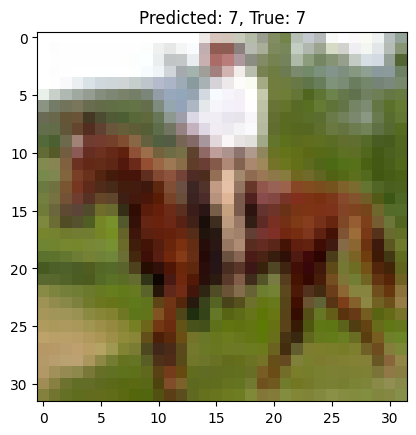

Epoch 4/5
1/1 [==============================] - 0s 38ms/step


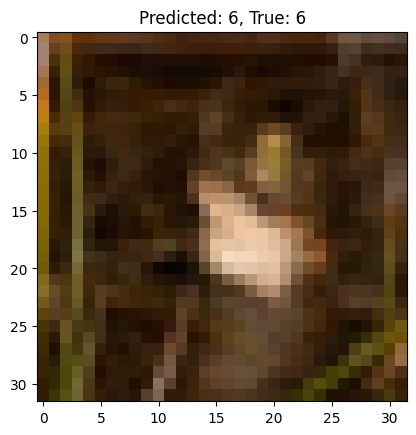

Epoch 5/5
1/1 [==============================] - 0s 24ms/step


_____________________________________________________
| Dimension  | Capa  | Filtro          | Precision  |
_____________________________________________________
| 32         | 3     | [64]            | 51.3159990 |
_____________________________________________________ 



In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

formato = "| %-10s | %-5s | %-15s | %-10s |"
formatores = "| %-10s | %-5s | %-15s | %-2.7f |"
cadena = "_" * 53

modo = "categorical"  # o "binary", según sea necesario
dimension = 32  # CIFAR-10 tiene imágenes de 32x32

(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)

train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train,
    batch_size=16)

validation_generator = validation_datagen.flow(
    x_validation, y_validation,
    batch_size=16)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


def show_images_on_decision(generator, num_images=10):
    for _ in range(len(generator)):
        batch = generator.next()
        predictions = model.predict(batch[0])
        for i in range(len(batch[0])):
            predicted_class = np.argmax(predictions[i])
            true_class = np.argmax(batch[1][i])
            if predicted_class == true_class:
                plt.figure()
                plt.imshow(batch[0][i])
                plt.title(f"Predicted: {predicted_class}, True: {true_class}")
                plt.show()
            if num_images > 0 and len(predictions) >= num_images:
                return


epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    history = model.fit(
        train_generator,
        steps_per_epoch=len(x_train) // 16,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(x_validation) // 16,
        verbose=1)

    # Mostrar imágenes cercanas a la toma de decisiones después de cada época
    show_images_on_decision(validation_generator, num_images=10)

# Mostrar resultados finales
print("\n")
print(cadena)
print(formato % ("Dimension", "Capa", "Filtro", "Precision"))
print(cadena)
print(formatores % (
    dimension, 3, '[64]', history.history['accuracy'][-1] * 100))
print(cadena, "\n")
